#vizualize 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import numpy as np
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow

In [3]:
path_dataset= r"/content/drive/MyDrive/Tài liệu năm 4/kỳ 2/HCSDLDPT/BTL Của Huy/2 Code/Hauu/data_new"
dir = path_dataset
datadir = path_dataset

In [4]:
a=[len(os.listdir(os.path.join(dir,os.listdir(dir)[x]))) for x in range(0,12)]
print(a)
sum(a)

[16, 20, 12, 23, 31, 26, 19, 14, 15, 15, 30, 22]


243

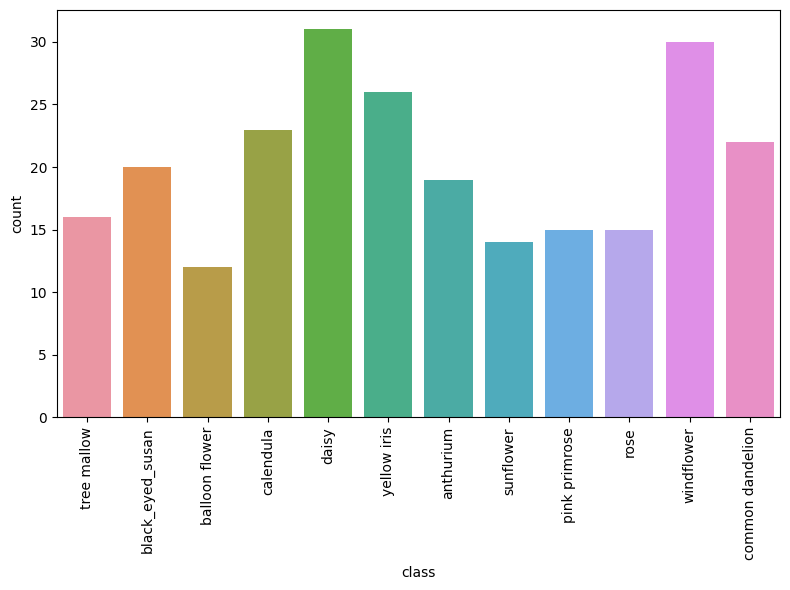

In [5]:
## count number of images in each class for training data
# tạo DataFrame với 2 columns, 'class' and 'count'
DF = pd.DataFrame(columns=['class','count'])
# cột 'class' được phổ biến với 12 thư mục con đầu tiên trong một thư mục thư mục được chỉ định.
# os.listdir là một hàm Python trả về danh sách các tệp và thư mục con trong một thư mục được chỉ định.
DF['class']=pd.Series([os.listdir(dir)[x] for x in range(0,12)])
# cột 'count' được phổ biến với số lượng tệp trong mỗi thư mục con bằng cách sử dụng khả năng hiểu danh sách.
# os.path.join được sử dụng để tạo đường dẫn đầy đủ tới từng thư mục con
# len(os.listdir) trả về số lượng tệp trong thư mục con đó.
DF['count']=pd.Series([len(os.listdir(os.path.join(dir,os.listdir(dir)[x]))) for x in range(0,12)])
# tạo ra một hình mới với kích thước 8 inch x 6 inch.
plt.figure(figsize=(8,6))
# tạo biểu đồ thanh bằng cách sử dụng Seaborn với 'class' trên trục x và cột 'count' trên trục y
g=sns.barplot(x='class', y='count',data=DF)
# xoay nhãn trục x 90 độ để dễ đọc hơn.
g.set_xticklabels(g.get_xticklabels(), rotation=90)
# tự động điều chỉnh khoảng cách giữa các ô con để tránh văn bản hoặc nhãn chồng chéo.
plt.tight_layout()

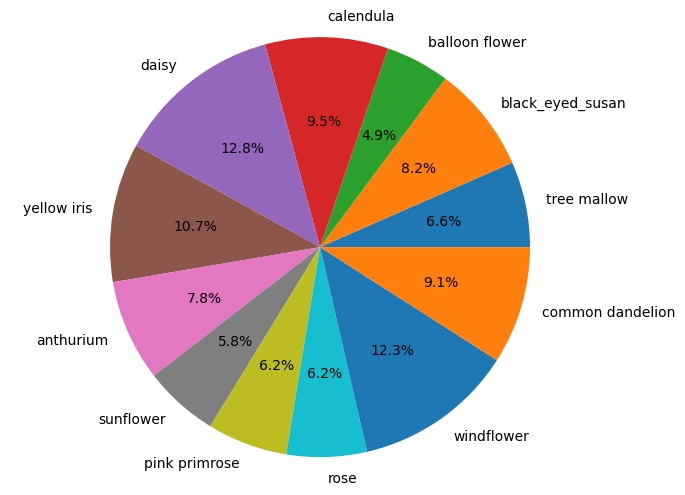

In [6]:
## Đoạn mã này tạo ra một biểu đồ hình tròn đếm số lượng hình ảnh trong mỗi class cho dữ liệu đào tạo
plt.figure(figsize=(8,6))
plt.tight_layout()
# tạo biểu đồ hình tròn bằng Matplotlib với cột 'count' làm dữ liệu, cột 'class' làm nhãn 
# chuỗi định dạng %1.1f%% để hiển thị phần trăm của mỗi lát cắt.
plt.pie(DF['count'],
        labels=DF['class'],
        autopct='%1.1f%%')
# Định dạng biểu đồ hình tròn.
plt.axis('equal')
# đặt tiêu đề
# plt.title('Proportion of each observed category')
plt.show()

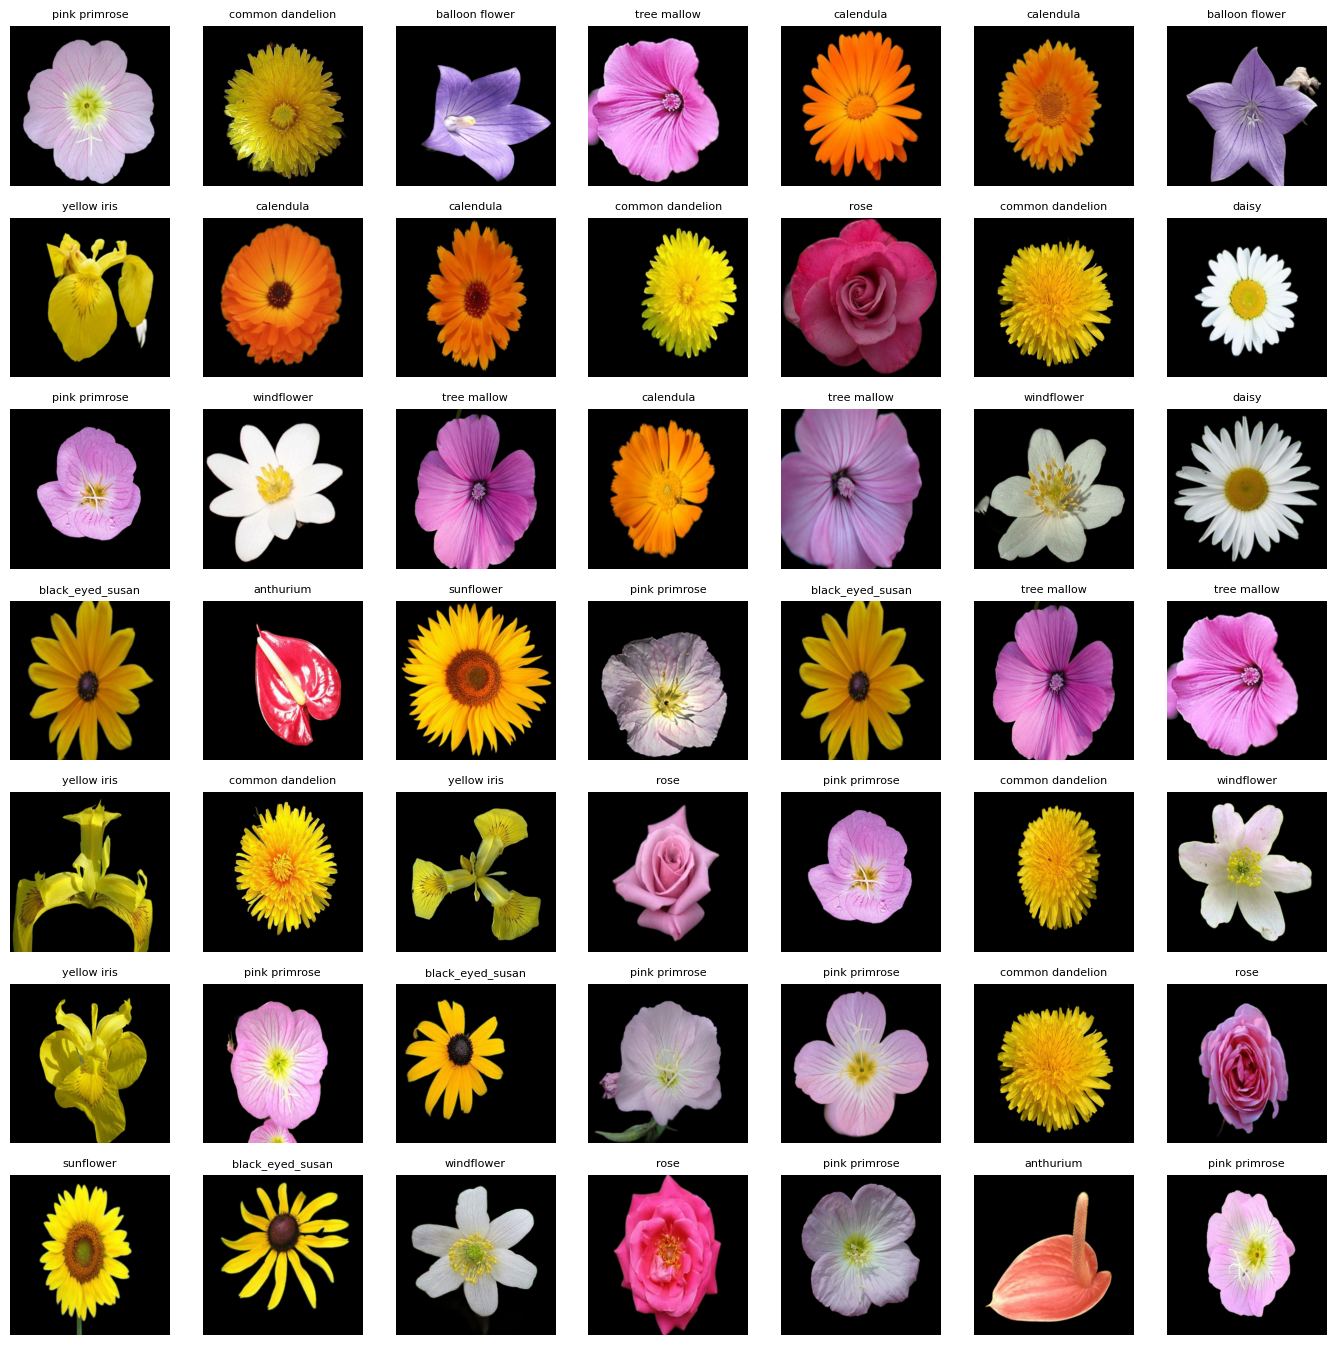

In [ ]:
W = 7
H = 7
# Tạo một đối tượng lưới hình ảnh với kích thước là W hàng và H cột
# với kích thước của lưới là (17,17) inches, và gán cho biến fig và axes.
fig, axes = plt.subplots(W, H, figsize = (17,17))

# Chuyển đổi đối tượng lưới hình ảnh từ dạng hai chiều sang một chiều duy nhất để dễ dàng truy cập và xử lý.
axes = axes.ravel() 
# Vòng lặp để duyệt qua từng phần tử trong lưới hình ảnh
for i in np.arange(0, W * H): 
    # Chọn ngẫu nhiên một nhãn từ danh sách các thư mục trong dir, đại diện cho tên lớp của hình ảnh.
    label = random.choice(os.listdir(dir))
    # Tạo đường dẫn đầy đủ đến thư mục của lớp hình ảnh đã chọn.
    class_dir = os.path.join(dir,label)
    # Chọn ngẫu nhiên một hình ảnh từ danh sách các tập tin trong thư mục lớp đã chọn.
    image = random.choice(os.listdir(class_dir))
    # Đọc hình ảnh từ đường dẫn đầy đủ của hình ảnh đã chọn.
    img = plt.imread(os.path.join(class_dir,image))
    # Hiển thị hình ảnh lên ô hình ảnh thứ i trong lưới.
    axes[i].imshow( img )
    # Đặt tiêu đề cho hình ảnh là nhãn của lớp hình ảnh đã chọn, với cỡ chữ là 8.
    axes[i].set_title(label, fontsize = 8)
    #  Tắt trục đồ thị để loại bỏ các dấu nhắc nhở trục trong hình ảnh.
    axes[i].axis('off')

# chia train test


In [ ]:
Categories = []
# Duyệt qua danh sách các thư mục (lớp) trong datadir (đường dẫn đến dữ liệu hình ảnh), và thêm tên của mỗi thư mục vào danh sách Categories.
for cat in os.listdir(datadir):
    Categories.append(cat)
Categories

['tree mallow',
 'black_eyed_susan',
 'balloon flower',
 'calendula',
 'daisy',
 'yellow iris',
 'anthurium',
 'sunflower',
 'pink primrose',
 'rose',
 'windflower',
 'common dandelion']

In [ ]:
dict_cat={}
count=0
for cat in Categories:

  dict_cat[str(count)]=str(cat)
  count+=1
print(dict_cat)

{'0': 'tree mallow', '1': 'black_eyed_susan', '2': 'balloon flower', '3': 'calendula', '4': 'daisy', '5': 'yellow iris', '6': 'anthurium', '7': 'sunflower', '8': 'pink primrose', '9': 'rose', '10': 'windflower', '11': 'common dandelion'}


# load dữ liệu trích xuất

In [ ]:
path="/content/drive/MyDrive/Tài liệu năm 4/kỳ 2/HCSDLDPT/BTL Của Huy/2 Code/Hauu/"
# path="/content/drive/MyDrive/BTL Của Huy (3)/2 Code/Hauu/"
path_flower_data= path+"flower_data.npy"
path_rgb=path+"RGB.npy"
path_hsv=path+"HSV.npy"
path_hog=path+"HOG.npy"
path_hog_hsv=path+"concat_hog_hsv.npy"
path_hog_rgb=path+"concat_hog_rgb.npy"


In [ ]:
import numpy as np
# Load the NumPy file
flower_data = np.load(path_flower_data, allow_pickle="True")
data_RGB = np.load(path_rgb,allow_pickle="True")
data_HSV = np.load(path_hsv ,allow_pickle="True")
data_HOG = np.load(path_hog , allow_pickle="True")
data_HOG_HSV=np.load(path_hog_hsv, allow_pickle="True")
data_HOG_RGB=np.load(path_hog_rgb, allow_pickle="True")


#Class and funtion for test

In [ ]:
import math

def distance_euclidean(x, y):
    if len(x) != len(y):
        return None  # Invalid input
    squared_distance = 0
    for i in range(len(x)):
        squared_distance += (x[i] - y[i]) ** 2
    return squared_distance ** 0.5 

def distance_cosine_similarity(x, y):
    dot_product = sum([xi * yi for xi, yi in zip(x, y)])
    magnitude_x = math.sqrt(sum([xi**2 for xi in x]))
    magnitude_y = math.sqrt(sum([yi**2 for yi in y]))
    return dot_product / (magnitude_x * magnitude_y)

In [ ]:

# Tìm k điểm gần nhất
def knn(X_train, y_train, x_new, k):
    distances = []
    for i in range(len(X_train)):
        d = distance_euclidean(X_train[i], x_new)
        distances.append((d, y_train[i]))
    distances.sort()
    k_nearest = distances[:k]
    # Dự đoán nhãn cho điểm dữ liệu mới
    labels = {}
    for distance in k_nearest:
        label = distance[1]
        if label in labels:
            labels[label] += 1
        else:
            labels[label] = 1
    sorted_labels = sorted(labels.items(), key=lambda x: x[1], reverse=True)
    return sorted_labels[0][0]

In [ ]:
# Tìm k điểm gần nhất
def knn_cosine(X_train, y_train, x_new, k):
    distances = []
    for i in range(len(X_train)):
        d = distance_cosine_similarity(X_train[i], x_new)
        distances.append((d, y_train[i]))
    distances.sort()
    k_nearest = distances[:k]
    # Dự đoán nhãn cho điểm dữ liệu mới
    labels = {}
    for distance in k_nearest:
        label = distance[1]
        if label in labels:
            labels[label] += 1
        else:
            labels[label] = 1
    sorted_labels = sorted(labels.items(), key=lambda x: x[1], reverse=True)
    return sorted_labels[0][0]

#test RGB

In [ ]:
#data_RGB
X_RGB_train=[] ;X_RGB_test =[] ; y_RGB_train=[]; y_RGB_test=[]
count=1
for i in data_RGB:
  count+=1
  if count%3==1:
    X_RGB_test.append(i[1])
    y_RGB_test.append(i[0])
  else:
    X_RGB_train.append(i[1])
    y_RGB_train.append(i[0])

In [ ]:
from sklearn.metrics import accuracy_score

y_RGB_pred=[]
for i in X_RGB_test:
  res= knn(X_RGB_train,y_RGB_train,i,7)
  y_RGB_pred.append(res)
print(y_RGB_test)
print(y_RGB_pred)
accuracy = accuracy_score(y_RGB_test, y_RGB_pred)
print(f"Accuracy: {accuracy:.2f}")

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11]
[9, 8, 9, 9, 0, 9, 11, 1, 1, 1, 1, 5, 7, 2, 8, 5, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 10, 10, 4, 4, 4, 4, 10, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 11, 7, 1, 8, 9, 9, 4, 8, 9, 9, 8, 9, 0, 4, 4, 10, 10, 4, 4, 4, 4, 4, 10, 5, 11, 1, 5, 7, 5, 5, 1]
Accuracy: 0.59


In [ ]:
from sklearn.metrics import accuracy_score

y_RGB_pred=[]
for i in X_RGB_test:
  res= knn_cosine(X_RGB_train,y_RGB_train,i,7)
  y_RGB_pred.append(res)
print(y_RGB_test)
print(y_RGB_pred)
accuracy = accuracy_score(y_RGB_test, y_RGB_pred)
print(f"Accuracy: {accuracy:.2f}")

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11]
[2, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 0, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 3, 0, 3, 0, 3, 0, 6, 3, 2, 2, 0, 0, 2, 2, 0, 0, 10, 5, 2, 5, 5, 2, 2, 2, 2, 0, 2, 3, 3, 3, 3, 3, 2, 5, 3, 10, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2]
Accuracy: 0.00


#Test HSV

In [ ]:
#data_HSV
X_HSV_train=[] ;X_HSV_test =[] ; y_HSV_train=[]; y_HSV_test=[]
count=1
for i in data_HSV:
  count+=1
  if count%3==1:
    X_HSV_test.append(i[1])
    y_HSV_test.append(i[0])
  else:
    X_HSV_train.append(i[1])
    y_HSV_train.append(i[0])

In [ ]:
from sklearn.metrics import accuracy_score

y_HSV_pred=[]
for i in X_HSV_test:
  res= knn(X_HSV_train,y_HSV_train,i,7)
  y_HSV_pred.append(res)
print(y_HSV_test)
print(y_HSV_pred)
accuracy = accuracy_score(y_HSV_test, y_HSV_pred)
print(f"Accuracy: {accuracy:.2f}")

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11]
[9, 9, 0, 0, 0, 0, 3, 11, 1, 5, 1, 5, 11, 2, 2, 5, 2, 3, 3, 3, 7, 3, 3, 3, 4, 10, 4, 10, 10, 10, 4, 4, 4, 10, 10, 5, 5, 5, 5, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 11, 1, 7, 1, 8, 9, 8, 8, 8, 9, 9, 9, 9, 9, 4, 10, 10, 10, 4, 10, 4, 4, 4, 10, 5, 11, 5, 5, 11, 5, 5, 1]
Accuracy: 0.62


In [ ]:
from sklearn.metrics import accuracy_score

y_HSV_pred=[]
for i in X_HSV_test:
  res= knn_cosine(X_HSV_train,y_HSV_train,i,7)
  y_HSV_pred.append(res)
print(y_HSV_test)
print(y_HSV_pred)
accuracy = accuracy_score(y_HSV_test, y_HSV_pred)
print(f"Accuracy: {accuracy:.2f}")

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11]
[4, 4, 4, 4, 4, 4, 10, 10, 10, 10, 10, 0, 0, 9, 3, 4, 4, 10, 10, 10, 10, 10, 10, 10, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 10, 0, 0, 0, 2, 2, 2, 10, 4, 10, 10, 0, 0, 0, 0, 3, 4, 3, 3, 3, 4, 3, 3, 4, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy: 0.00


#test HOG

In [ ]:
#data_HOG
X_HOG_train=[] ;X_HOG_test =[] ; y_HOG_train=[]; y_HOG_test=[]
count=1
for i in data_HOG:
  count+=1
  if count%3==1:
    X_HOG_test.append(i[1])
    y_HOG_test.append(i[0])
  else:
    X_HOG_train.append(i[1])
    y_HOG_train.append(i[0])

In [ ]:
from sklearn.metrics import accuracy_score

y_HOG_pred=[]
progress=0
for i in X_HOG_test:
  res= knn(X_HOG_train,y_HOG_train,i,7)
  y_HOG_pred.append(res)
  print(progress,end=" ")
  progress+=1


print(y_HOG_test)
print(y_HOG_pred)
accuracy = accuracy_score(y_HOG_test, y_HOG_pred)
print(f"Accuracy: {accuracy:.2f}")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11]
[11, 11, 3, 11, 3, 11, 11, 11, 11, 5, 10, 2, 5, 10, 11, 11, 10, 3, 11, 11, 11, 11, 3, 10, 11, 11, 11, 11, 4, 10, 11, 11, 10, 11, 10, 5, 5, 5, 5, 5, 5, 5, 5, 10, 5, 3, 10, 10, 3, 10, 10, 7, 10, 11, 11, 10, 11, 11, 2, 6, 9, 9, 6, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 10, 11, 10, 10, 11, 11, 11, 11]
Accuracy: 0.33


In [ ]:
from sklearn.metrics import accuracy_score

y_HOG_pred=[]
progress=0
for i in X_HOG_test:
  res= knn_cosine(X_HOG_train,y_HOG_train,i,7)
  y_HOG_pred.append(res)
  print(progress,end=" ")
  progress+=1


print(y_HOG_test)
print(y_HOG_pred)
accuracy = accuracy_score(y_HOG_test, y_HOG_pred)
print(f"Accuracy: {accuracy:.2f}")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 

#test hog+hsv

In [ ]:
#data_HOG_HSV
X_HOG_HSV_train=[] ;X_HOG_HSV_test =[] ; y_HOG_HSV_train=[]; y_HOG_HSV_test=[]
count=1
for i in data_HOG_HSV:
  count+=1
  if count%3==1:
    X_HOG_HSV_test.append(i[1])
    y_HOG_HSV_test.append(i[0])
  else:
    X_HOG_HSV_train.append(i[1])
    y_HOG_HSV_train.append(i[0])

In [ ]:
from sklearn.metrics import accuracy_score

y_HOG_HSV_pred=[]
progress=0
for i in X_HOG_HSV_test:
  res= knn(X_HOG_HSV_train,y_HOG_HSV_train,i,7)
  y_HOG_HSV_pred.append(res)
  print(progress,end=" ")
  progress+=1

print()
print(y_HOG_HSV_test)
print(y_HOG_HSV_pred)
accuracy = accuracy_score(y_HOG_HSV_test, y_HOG_HSV_pred)
print(f"Accuracy: {accuracy:.2f}")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11]
[9, 9, 0, 0, 0, 0, 3, 11, 1, 5, 1, 5, 11, 2, 2, 5, 2, 3, 3, 3, 7, 3, 3, 3, 4, 10, 4, 10, 10, 10, 4, 4, 4, 10, 10, 5, 5, 5, 5, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 11, 1, 7, 1, 8, 9, 8, 8, 8, 9, 9, 9, 9, 9, 4, 10, 10, 10, 4, 10, 4, 4, 4, 10, 5, 11, 5, 5, 11, 5, 5, 1]
Accuracy: 0.62


# test hog+rgb

In [ ]:
#data_HOG_RGB
X_HOG_RGB_train=[] ;X_HOG_RGB_test =[] ; y_HOG_RGB_train=[]; y_HOG_RGB_test=[]
count=1
for i in data_HOG_RGB:
  count+=1
  if count%3==1:
    X_HOG_RGB_test.append(i[1])
    y_HOG_RGB_test.append(i[0])
  else:
    X_HOG_RGB_train.append(i[1])
    y_HOG_RGB_train.append(i[0])

In [ ]:
from sklearn.metrics import accuracy_score

y_HOG_RGB_pred=[]
progress=0
for i in X_HOG_RGB_test:
  res= knn(X_HOG_RGB_train,y_HOG_RGB_train,i,7)
  y_HOG_RGB_pred.append(res)
  print(progress,end=" ")
  progress+=1

print()
print(y_HOG_RGB_test)
print(y_HOG_RGB_pred)
accuracy = accuracy_score(y_HOG_RGB_test, y_HOG_RGB_pred)
print(f"Accuracy: {accuracy:.2f}")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11]
[9, 8, 9, 9, 0, 9, 11, 1, 1, 1, 1, 5, 7, 2, 8, 5, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 10, 10, 4, 4, 4, 4, 10, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 11, 7, 1, 8, 9, 9, 4, 8, 9, 9, 8, 9, 0, 4, 4, 10, 10, 4, 4, 4, 4, 4, 10, 5, 11, 1, 5, 7, 5, 5, 1]
Accuracy: 0.59


# test Hình ảnh đầu vào và kết quả

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## trích xuất đặc trưng

In [ ]:
#This function converts an RGB pixel value to an HSV color model
def rgb_to_hsv(pixel):
    # Extract red, green and blue values from input pixel.then Normalize the RGB values by dividing with 255.0 to get values between 0 and 1
    r, g, b = pixel
    r, g, b = b / 255.0, g / 255.0, r / 255.0

    # Find the maximum and minimum value among R, G, and B values
    v = max(r, g, b)
    delta = v - min(r, g, b)

    # If there is no difference between the maximum and minimum value, saturation and hue are set to zero
    if delta == 0:
        h = 0
        s = 0
    else:
        # Calculate the saturation value
        s = delta / v
        
        # Calculate the hue value
        if r == v:
            h = (g - b) / delta
        elif g == v:
            h = 2 + (b - r) / delta
        else:
            h = 4 + (r - g) / delta
        # Normalize the hue value to be between 0 and 1 and convert it to degrees
        h = (h / 6) % 1.0

    # Convert the hue, saturation, and value values from float to integer values within the ranges of 0-180, 0-255, and 0-255 respectively
    return [int(h * 180), int(s * 255), int(v * 255)]

#This function takes an RGB image as input and converts it to an HSV color model
def covert_image_rgb_to_hsv(img):
    # Create an empty array to hold the converted HSV image
    hsv_image = []

    # Loop through each pixel in the image
    for i in img:
        # Create an empty array to hold the converted HSV values of each pixel
        hsv_image2 = []
        for j in i:
            # Convert each RGB pixel value to its HSV equivalent using the rgb_to_hsv() function
            new_color = rgb_to_hsv(j)
            hsv_image2.append((new_color))
        # Add the converted HSV values of each pixel to the array that holds the converted HSV image
        hsv_image.append(hsv_image2)

    # Convert the list of lists to a numpy array and return the final HSV image
    hsv_image = np.array(hsv_image)
    return hsv_image

#This function calculates a histogram of an input image based on the specified channels, histogram size and ranges
def my_calcHist(image, channels, bins, ranges):
    # Initialize a numpy array to hold the histogram counts for each bin
    hist = np.zeros(bins, dtype=np.int64)

    # Loop through every pixel in the image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the pixel values for the specified color channels
            bin_vals = [image[i, j, c] for c in channels]
            
            # Calculate the bin indices (bin_idxs) for each channel based on the pixel values and the range of possible pixel values 
            bin_idxs = [
                (bin_vals[c] - ranges[c][0]) * bins[c]
                // (ranges[c][1] - ranges[c][0])
                for c in range(len(channels))
            ]
            
            # Increment the count of the corresponding bin by 1
            hist[tuple(bin_idxs)] += 1

    # Return the final histogram as a numpy array
    return hist


In [ ]:
from skimage import feature
import cv2

#This function converts an RGB image to a grayscale image using the formula Y = 0.299R + 0.587G + 0.114B
def convert_image_rgb_to_gray(img_rgb, resize="no"):
    # Get the height (h), width (w), and number of channels (_) of the input RGB image
    h, w, _ = img_rgb.shape

    # Create an empty numpy array of zeros with dimensions (h, w) to hold the converted grayscale values
    img_gray = np.zeros((h, w), dtype=np.uint32)

    # Convert each pixel from RGB to grayscale using the formula Y = 0.299R + 0.587G + 0.114B
    for i in range(h):
        for j in range(w):
            r, g, b = img_rgb[i, j]
            gray_value = int(0.299 * r + 0.587 * g + 0.114 * b)
            img_gray[i, j] = gray_value
        
    # If the resize flag is specified, resize the grayscale image to dimensions of (496, 496)
    if resize != "no":
        img_gray = cv2.resize(src=img_gray, dsize=(496, 496))

    # Return the final grayscale image as a numpy array
    return np.array(img_gray)


def hog_feature(gray_img):  # default gray_image
    # Compute the HOG features and the HOG visualization image using the scikit-image "feature" module's hog() function.
    (hog_feats, hogImage) = feature.hog(
        gray_img,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        transform_sqrt=True,
        block_norm="L2",
        visualize=True,
    )

    # Return the HOG feature descriptor as a numpy array
    return hog_feats


In [ ]:
#This is a Python function that extracts features from an RGB image using
#Histogram of Oriented Gradients (HOG) and a 3D color histogram in HSV color space.
def feature_extraction(img):  # RGB image
    bins = [8, 12, 3]
    ranges = [[0, 180], [0, 256], [0, 256]]
    img_hsv = covert_image_rgb_to_hsv(img)
    hist_my = my_calcHist(img_hsv, [0, 1, 2], bins, ranges)
    embedding_hsv = list(hist_my.flatten())
    embedding_hsv[0] = 0

    gray_image = convert_image_rgb_to_gray(img)
    embedding_hog = list(hog_feature(gray_image))

    data = embedding_hsv + embedding_hog
    return data

## hàm knn

In [ ]:
import math

#This is a Python function that calculates the Euclidean distance between two vectors x and y
def distance_euclidean(x, y):
    if len(x) != len(y):
        return None  # Invalid input
    squared_distance = 0
    for i in range(len(x)):
        squared_distance += (x[i] - y[i]) ** 2
    return squared_distance ** 0.5


# This is a Python function that performs k-Nearest Neighbors (k-NN) classification on a new data point x_new,
#  given a training dataset X_train and corresponding labels y_train
def knn(X_train, y_train, x_new, k):
    distances = []
    #each data point in X_train, the Euclidean distance between that point and x_new is calculated.
    for i in range(len(X_train)):
        d = distance_euclidean(X_train[i], x_new)
        distances.append((d, y_train[i]))

    #The list of distances is then sorted in ascending order based on the distance values, and the k nearest neighbors are selected
    distances.sort()
    k_nearest = distances[:k]

    # a dictionary "labels"  count the occurrences of each label among the k nearest neighbors
    labels = {}
    for distance in k_nearest:
        label = distance[1]
        if label in labels:
            labels[label] += 1
        else:
            labels[label] = 1
    #The predicted label for the new data point is the label with the highest count
    sorted_labels = sorted(labels.items(), key=lambda x: (x[1],x[0]), reverse=True)
    return sorted_labels[0][0]

##trích xuất đặc trưng ảnh test

In [ ]:
#data_HOG_RGB
X_HOG_HSV=[] ; y_HOG_HSV=[];
for i in data_HOG_HSV:
    X_HOG_HSV.append(i[1])
    y_HOG_HSV.append(i[0])


In [ ]:
dict={'0': 'tree mallow', '1': 'black_eyed_susan', '2': 'balloon flower', '3': 'calendula', '4': 'daisy', '5': 'yellow iris', '6': 'anthurium', '7': 'sunflower', '8': 'pink primrose', '9': 'rose', '10': 'windflower', '11': 'common dandelion'}


In [ ]:
path_datatest=r"/content/drive/MyDrive/Tài liệu năm 4/kỳ 2/HCSDLDPT/BTL Của Huy/2 Code/Hauu/data_test/"
os.listdir(path_datatest)

['hoahong.jpg',
 '.ipynb_checkpoints',
 'haiquytrang.jpg',
 'dienvivang.jpg',
 'boconganhvang.jpg']

134244
rose


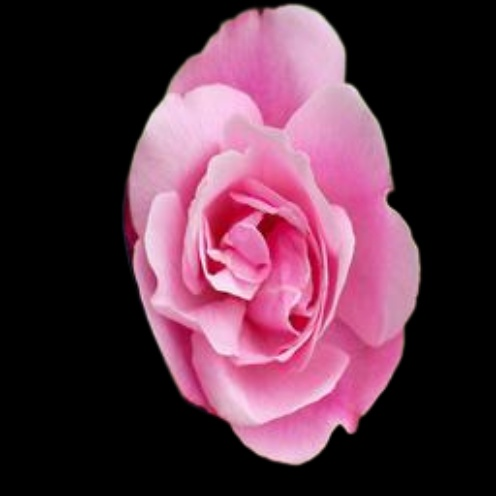

In [ ]:
path_image_test1="/content/drive/MyDrive/Tài liệu năm 4/kỳ 2/HCSDLDPT/BTL Của Huy/2 Code/Hauu/data_test/hoahong.jpg"
img = cv2.imread(path_image_test1, cv2.COLOR_BGR2RGB)
# print(img)
img_embedding =feature_extraction(img)
print(len(img_embedding))
res= knn(X_HOG_HSV,y_HOG_HSV,img_embedding,7)
print(dict[str(res)])
cv2_imshow(img)

134244
yellow iris


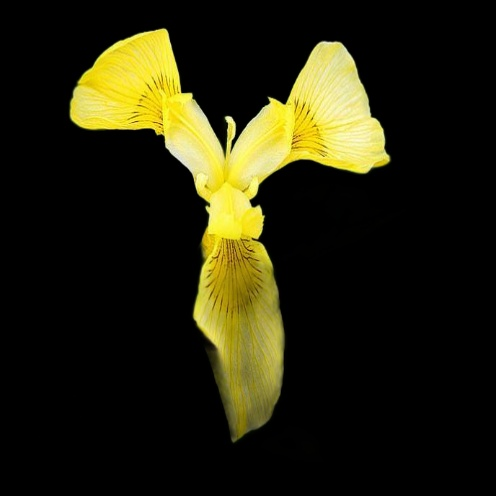

In [ ]:
path_image_test1="/content/drive/MyDrive/Tài liệu năm 4/kỳ 2/HCSDLDPT/BTL Của Huy/2 Code/Hauu/data_test/dienvivang.jpg"
img = cv2.imread(path_image_test1, cv2.COLOR_BGR2RGB)
img_embedding =feature_extraction(img)
print(len(img_embedding))
res= knn(X_HOG_HSV,y_HOG_HSV,img_embedding,7)
print(dict[str(res)])
cv2_imshow(img)


windflower


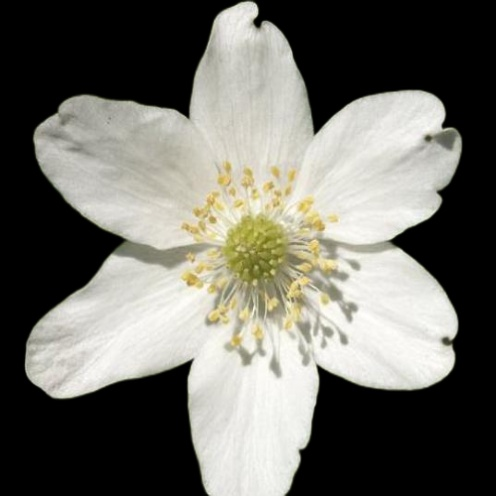

In [ ]:
path_image_test1="/content/drive/MyDrive/Tài liệu năm 4/kỳ 2/HCSDLDPT/BTL Của Huy/2 Code/Hauu/data_test/haiquytrang.jpg"
img1 = cv2.imread(path_image_test1, cv2.COLOR_BGR2RGB)
img_embedding1 =feature_extraction(img1)
res1= knn(X_HOG_HSV,y_HOG_HSV,img_embedding1,7)
print(dict[str(res1)])
cv2_imshow(img1)


common dandelion


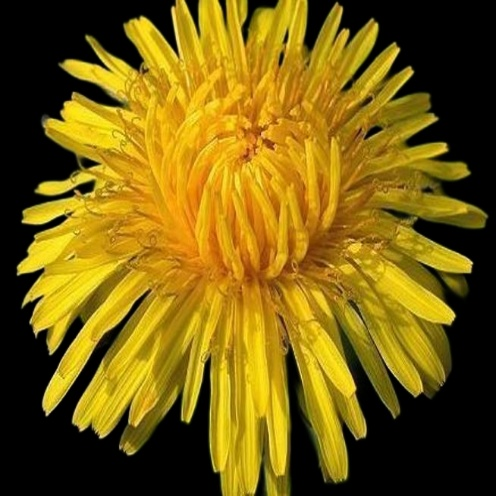

In [ ]:
path_image_test1="/content/drive/MyDrive/Tài liệu năm 4/kỳ 2/HCSDLDPT/BTL Của Huy/2 Code/Hauu/data_test/boconganhvang.jpg"
img1 = cv2.imread(path_image_test1, cv2.COLOR_BGR2RGB)
img_embedding1 =feature_extraction(img1)
res1= knn(X_HOG_HSV,y_HOG_HSV,img_embedding1,7)
print(dict[str(res1)])
cv2_imshow(img1)
